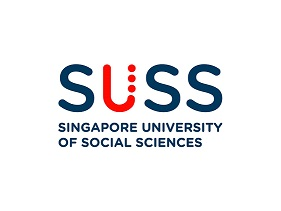
# <p style ='text-align: center;'> ANL252 </p>
## <p style ='text-align: center;'> Python for Data Analysis </p>
## <p style ='text-align: center;'> End-of-Course Assessment - July Semester 2022 </p>

# Qn2 

### 1st Stage - Data Quality Assessment

#### In this stage of data pre-processing, we need to perform a data quality assessment of the ECA-data. Here, we need to explore if there are any missing variables or outliers contained in the data. Such data could hinder the performance of our machine learning technique that result in a biased statistical estimation (Wu, 2022). 
#### i. 
#### First, we need to import the following packages and modules into the Jupyter environment.

In [1]:
# import pandas as pd: This module provides users to access the pandas module functions that enables them to read a csv or xlxs data file.
# import numpy as np: This module allows users to work the high multidimensional array and matrices contain in the data file.
# from matplotlib import pyplot as plt. This module allows users to create figures, plots and labels in the Jupyter environment.
# import seaborn as sns. This module allows users to visualise data by creating of graphs and plots.
# import sklearn. This module allows users to perform data analysis tasks like pre-processing, regression, and data reduction.


import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

import seaborn as sns

import sklearn

from sklearn import decomposition

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

import warnings

warnings.filterwarnings('ignore')


#### ii.

#### Next, we'll load the ECA_data and examine its structure as a data frame (df).

In [2]:
# Making a list of missing value types "$0" and convert it to NaN.
# Drop the ID column

missing_values = ["$0"]

df_raw = pd.read_csv('ECA_data.csv', na_values = missing_values)

df_raw.drop(df_raw.columns[0], axis=1, inplace=True)

df_raw

,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,S2,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,210000,0.000,235822,1,1,1.0,2.0,30,0,0,...,0,0,0,0,0,0,0,0,0,0
1,260000,10928.050,278481,0,0,2.0,2.0,31,0,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,400000,65397.850,431993,0,0,3.0,1.0,51,0,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,20000,3695.300,22368,0,0,2.0,1.0,58,-1,2,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,180000,68.250,166900,0,1,2.0,1.0,42,0,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18764,220000,33065.900,225862,0,0,3.0,1.0,39,0,0,...,192815,208365,88004,31237,15980,20000,5003,3047,5000,1000
18765,150000,294.525,149966,0,0,3.0,2.0,43,-1,-1,...,1828,3502,8979,5190,0,3526,8998,129,0,0
18766,30000,623.875,30327,1,0,2.0,2.0,37,3,2,...,3356,2758,20878,20582,19357,0,22000,4200,2000,3100
18767,80000,0.000,94607,1,0,3.0,1.0,41,-1,0,...,78379,76304,52774,11855,48944,3409,1178,1926,52964,1804


In [3]:
df_raw["EDUCATION"].value_counts()

2.0    8872
1.0    6411
3.0    3139
0.0     334
Name: EDUCATION, dtype: int64

#### iii.

#### To obtain a quick overview of the loaded dataset, we will use following codes for python to summarise the missing values contained in the dataset. We can observe that there are 13, 38 and 1 missing values contained in the 'EDUCATION', 'MARITAL' and 'R3' columns repectively. 

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18769 entries, 0 to 18768
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT      18769 non-null  int64  
 1   BALANCE    18769 non-null  float64
 2   INCOME     18769 non-null  int64  
 3   RATING     18769 non-null  int64  
 4   GENDER     18769 non-null  int64  
 5   EDUCATION  18756 non-null  float64
 6   MARITAL    18731 non-null  float64
 7   AGE        18769 non-null  int64  
 8   S1         18769 non-null  int64  
 9   S2         18769 non-null  int64  
 10  S3         18769 non-null  int64  
 11  S4         18769 non-null  int64  
 12  S5         18769 non-null  int64  
 13  B1         18769 non-null  int64  
 14  B2         18769 non-null  int64  
 15  B3         18769 non-null  int64  
 16  B4         18769 non-null  int64  
 17  B5         18769 non-null  int64  
 18  R1         18769 non-null  int64  
 19  R2         18769 non-null  int64  
 20  R3    

In [5]:
df_raw.isna().sum()

LIMIT         0
BALANCE       0
INCOME        0
RATING        0
GENDER        0
EDUCATION    13
MARITAL      38
AGE           0
S1            0
S2            0
S3            0
S4            0
S5            0
B1            0
B2            0
B3            0
B4            0
B5            0
R1            0
R2            0
R3            1
R4            0
R5            0
dtype: int64

#### We noticed that the 'R3' variable is an object rather than an integer or a float, and that it contains an empty value. As a result, we must address this issue immediately because it may have an impact on our mathematical and statistical analyses during data preprocessing stage.

#### First, we must replace the missing values in the 'R3' column with the 'Most Frequent' variable count. 

In [6]:
df_raw['R3'].value_counts()

0         3909
1000       898
2000       767
3000       559
5000       491
          ... 
826          1
1249         1
235075       1
4041         1
1926         1
Name: R3, Length: 5217, dtype: int64

In [7]:
df_raw['R3'].fillna(df_raw['R3'].value_counts().index[0]
                  ,inplace = True)

#### Next, the 'R3' column must then be converted from an object to an integer. 

In [8]:
df_raw['R3'] = df_raw['R3'].str.replace('$','')
df_raw['R3'] = df_raw['R3'].str.replace(',','')
df_raw['R3'] = df_raw['R3'].astype(int)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18769 entries, 0 to 18768
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT      18769 non-null  int64  
 1   BALANCE    18769 non-null  float64
 2   INCOME     18769 non-null  int64  
 3   RATING     18769 non-null  int64  
 4   GENDER     18769 non-null  int64  
 5   EDUCATION  18756 non-null  float64
 6   MARITAL    18731 non-null  float64
 7   AGE        18769 non-null  int64  
 8   S1         18769 non-null  int64  
 9   S2         18769 non-null  int64  
 10  S3         18769 non-null  int64  
 11  S4         18769 non-null  int64  
 12  S5         18769 non-null  int64  
 13  B1         18769 non-null  int64  
 14  B2         18769 non-null  int64  
 15  B3         18769 non-null  int64  
 16  B4         18769 non-null  int64  
 17  B5         18769 non-null  int64  
 18  R1         18769 non-null  int64  
 19  R2         18769 non-null  int64  
 20  R3    

#### iv.

#### Before we can detect outliers, we must first understand the characteristics of the numerical values in the dataset. 

#### We should expect some outliers in the 'LIMIT,' 'BALANCE,' and 'INCOME' columns. This is because income varies from person to person, and a few individuals may have earned more than the rest of the population. As a result, the 'LIMIT' and 'BALANCE' amounts for these individuals may differ, and this is likely to be reflected as an outlier datapoint.


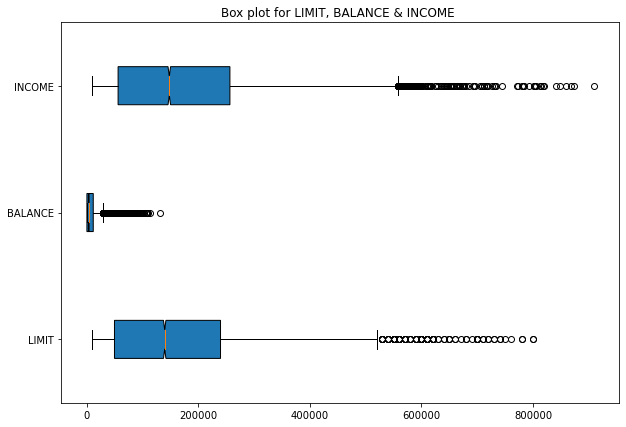

In [9]:
LIMIT = (df_raw['LIMIT'])
BALANCE = (df_raw['BALANCE'])
INCOME = (df_raw['INCOME'])

data = [LIMIT, BALANCE, INCOME]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0) 

# x-axis labels
ax.set_yticklabels(['LIMIT', 'BALANCE', 'INCOME'])
 
# Adding title
plt.title("Box plot for LIMIT, BALANCE & INCOME ")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

#### In terms of the ‘B(n)’ and ‘R(n)’ variables, the amount and the ability of the bill repayment could also differ one customer to the other. As such, their bill repayment ability could be tied to their ‘INCOME’ earned. As such, the bill repayment amount contained in the ‘B(n)’ and ‘R(n)’ variables could also be different and is likely to be reflected as an outlier datapoint. 

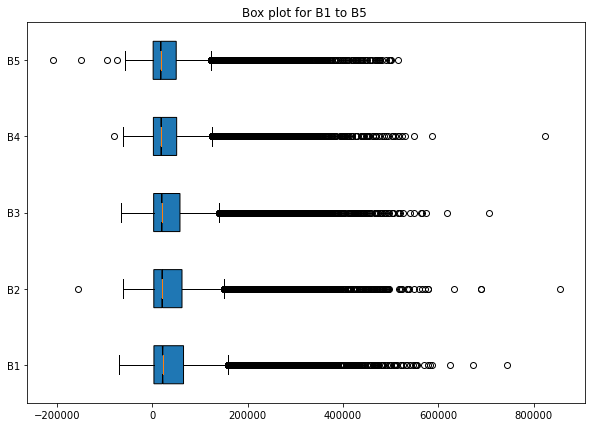

In [10]:
B1 = (df_raw['B1'])
B2 = (df_raw['B2'])
B3 = (df_raw['B3'])
B4 = (df_raw['B4'])
B5 = (df_raw['B5'])

data = [B1, B2, B3, B4, B5]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0) 

# x-axis labels
ax.set_yticklabels(['B1', 'B2', 'B3', 'B4', 'B5'])
 
# Adding title
plt.title("Box plot for B1 to B5 ")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

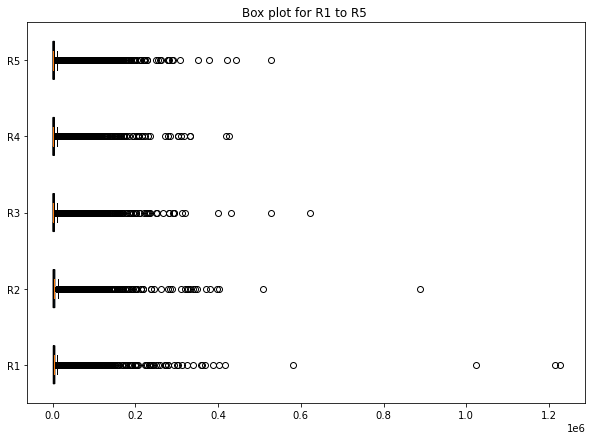

In [11]:
R1 = (df_raw['R1'])
R2 = (df_raw['R2'])
R3 = (df_raw['R3'])
R4 = (df_raw['R4'])
R5 = (df_raw['R5'])

data = [R1, R2, R3, R4, R5]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0) 

# x-axis labels
ax.set_yticklabels(['R1', 'R2', 'R3', 'R4', 'R5'])
 
# Adding title
plt.title("Box plot for R1 to R5 ")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()


#### However, the same cannot be said for the ‘AGE” column.  Since age is an important factor in determining a customer's creditworthiness and loan eligibility, it is unlikely that the customer is under 0 or over 100 years old. We can see from the box plot that the 'AGE' column contains 10 extreme outlier data points.

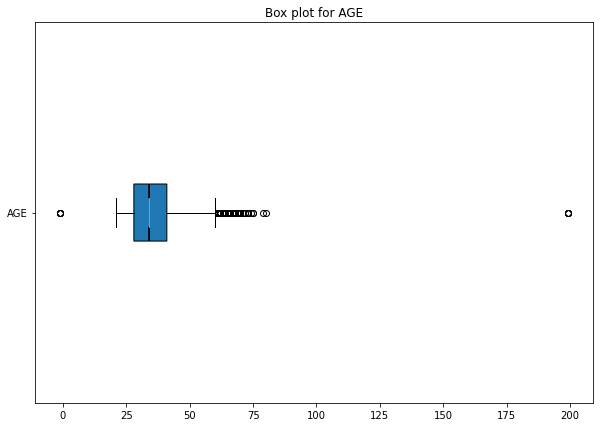

In [12]:
AGE = (df_raw['AGE'])

data = [AGE]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0) 

# x-axis labels
ax.set_yticklabels(['AGE'])
 
# Adding title
plt.title("Box plot for AGE")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

In [13]:
print(np.where(df_raw['AGE']<0))
print(np.where(df_raw['AGE']>100))

(array([  664,  4242, 15358, 18165, 18166], dtype=int64),)
(array([  535,  1617,  7833, 18082, 18282], dtype=int64),)


### 2nd Stage - Data Cleaning

#### In this stage of data pre-processing, we will use the 'Most Frequent' variable count to replace the 'Blanks' in the 'EDUCATION' and 'MARITAL' columns, as well as treat the outliers contained in the dataset.

#### i. 
#### We will use the following codes to replace the 'Blanks' in the 'EDUCATION' and 'MARITAL' columns. 

In [14]:
df_raw['EDUCATION'].value_counts()

2.0    8872
1.0    6411
3.0    3139
0.0     334
Name: EDUCATION, dtype: int64

In [15]:
df_raw['EDUCATION'].fillna(df_raw['EDUCATION'].value_counts().index[0]
                  ,inplace = True)

In [16]:
df_raw['MARITAL'].value_counts()

2.0    9834
1.0    8708
0.0     189
Name: MARITAL, dtype: int64

In [17]:
df_raw['MARITAL'].fillna(df_raw['MARITAL'].value_counts().index[0]
                  ,inplace = True)

#### ii.
#### Although it is preferable to remove all outliers from the dataset, we can help to minimise their presence by using the interquartile range method. This is because some of the outliers in the dataset may represent legitimate observations for the analysis. From the results below, we can observe that the shape of our data frame has significantly been reduced after the outliers have been removed.

In [18]:
# define a funtion called outliers which returns a list of index outliers

def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    
    return ls

In [19]:
#create an empty list to store the output indices from multiple columns

index_list = []
for feature in ['LIMIT','BALANCE','INCOME','AGE',
                'B1','B2','B3','B4','B5',
                'R1','R2','R3','R4','R5']:
    index_list.extend(outliers(df_raw, feature))

In [20]:
#create the index list

index_list

[300,
 735,
 761,
 1012,
 1273,
 1383,
 1815,
 1955,
 2211,
 2652,
 2852,
 2885,
 3069,
 3688,
 3834,
 4151,
 4176,
 4362,
 4443,
 4799,
 4870,
 4912,
 6134,
 6149,
 6276,
 6326,
 6775,
 7877,
 8020,
 8124,
 8285,
 8286,
 9030,
 9479,
 9553,
 9612,
 9661,
 9700,
 9713,
 9891,
 9903,
 10008,
 10087,
 10089,
 10144,
 10150,
 10802,
 10944,
 11086,
 11533,
 11536,
 11571,
 11619,
 11795,
 11860,
 11865,
 12033,
 12146,
 12183,
 12207,
 12209,
 12218,
 12487,
 12575,
 12662,
 12992,
 13089,
 13177,
 13272,
 13322,
 13452,
 13455,
 13856,
 13895,
 14255,
 14586,
 14801,
 14881,
 14905,
 14945,
 14996,
 15641,
 15690,
 15802,
 15866,
 16027,
 16228,
 16236,
 16326,
 16344,
 16901,
 16903,
 17330,
 17484,
 17591,
 17601,
 17780,
 17905,
 18173,
 18340,
 18509,
 18630,
 18655,
 18732,
 2,
 11,
 47,
 70,
 83,
 96,
 119,
 141,
 174,
 175,
 207,
 259,
 264,
 274,
 310,
 320,
 324,
 326,
 378,
 379,
 396,
 397,
 402,
 444,
 449,
 454,
 455,
 456,
 476,
 489,
 490,
 505,
 588,
 592,
 616,
 622,
 62

In [21]:
#define a function called to "remove" which return a cleaned dataframe without outliers

def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [22]:
df_cleaned = remove(df_raw, index_list)

In [23]:
df_cleaned.shape

(12503, 23)

#### For this process, we have replaced the 'Blank' values as well as treated the outliers in the dataset.

In [24]:
df_cleaned.isna().sum()

LIMIT        0
BALANCE      0
INCOME       0
RATING       0
GENDER       0
EDUCATION    0
MARITAL      0
AGE          0
S1           0
S2           0
S3           0
S4           0
S5           0
B1           0
B2           0
B3           0
B4           0
B5           0
R1           0
R2           0
R3           0
R4           0
R5           0
dtype: int64

### 3rd stage - Data Transformation

#### In this stage of data preparation, we will normalise the numeric values in all the columns. This is because measuring the data on the same scale can contribute to a more accurate analysis for our study (Wu, 2022). 

#### Before normalising the variables for the current dataset, we need to make a backup copy of the cleaned dataset for data exploration. 

In [25]:
 df_cleaned2 = df_cleaned.copy()

#### The following codes will be used to normalise the dataset columns.

In [26]:
x = df_cleaned.iloc[:,:]
df_cleaned.iloc[:,:] = (x-x.min())/ (x.max() - x.min())
df_cleaned

,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,S2,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,0.392157,0.000000,0.413204,1.0,1.0,0.333333,1.0,0.230769,0.125,0.111111,...,0.105449,0.068300,0.100017,0.141155,0.169331,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.333333,0.002358,0.287092,0.0,1.0,0.666667,0.5,0.538462,0.125,0.111111,...,0.112586,0.072040,0.113209,0.171122,0.181576,0.054364,0.178039,0.447544,0.186774,0.373583
6,0.039216,0.171072,0.024080,0.0,0.0,1.000000,1.0,0.589744,0.375,0.333333,...,0.279487,0.254033,0.286866,0.348245,0.169331,0.000000,0.051957,0.061823,0.000000,0.000000
7,0.078431,0.246709,0.084655,0.0,1.0,0.666667,0.5,0.333333,0.125,0.111111,...,0.325982,0.285526,0.220015,0.249902,0.280314,0.181818,0.086595,0.060158,0.103648,0.101215
9,0.039216,0.181074,0.018552,0.0,1.0,0.333333,1.0,0.051282,0.625,0.444444,...,0.271960,0.247349,0.294836,0.347402,0.379514,0.000000,0.216488,0.000000,0.207297,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18760,0.392157,0.015118,0.436793,1.0,0.0,0.666667,0.5,0.333333,0.375,0.333333,...,0.119609,0.083934,0.116058,0.158578,0.186319,0.000000,0.000000,0.000000,0.000000,0.000000
18761,0.000000,0.053226,0.000000,0.0,0.0,1.000000,0.5,0.564103,0.125,0.111111,...,0.164353,0.068300,0.100017,0.141155,0.169331,0.000000,0.000000,0.000000,0.000000,0.000000
18763,0.137255,0.438758,0.150931,1.0,0.0,0.666667,1.0,0.333333,0.375,0.333333,...,0.545574,0.564723,0.597403,0.716861,0.720800,0.318182,0.000000,0.728560,0.000000,0.404858
18765,0.274510,0.010177,0.256106,0.0,0.0,1.000000,1.0,0.564103,0.000,0.000000,...,0.115803,0.090200,0.157629,0.177325,0.169331,0.320545,0.779183,0.013426,0.000000,0.000000


#### For this process, we have normalised all the column values contained in the dataset.


In [27]:
# OPTIONAL PROCESS

# We can import use pickle to store the cleaned and transformed data in the workbook 
# so that we do not have to redo all the above coding steps

#import pickle

In [28]:
#with open('Transformed', 'wb') as file:
    #pickle.dump(df, file)

In [29]:
#unpickled_df = pickle.load(open('Transformed', 'rb'))
#print(unpickled_df)

### 4th stage - Data reduction (preliminary stage)

#### In this stage of data pre-processing, we will reduce the dimension of the dataset in order to obtain the optimal number of variables to feed into the machine learning algorithm. According to Sidall (2002), we should use the fewest number of entities to explain the occurrence of an event, i.e. the Principle of Parsimony. To accomplish this, we must examine the pair correlation values for each variable in the dataset. 

#### i.
#### Using 'B1' as our dependent variable for the Linear Regression model, we can generate a correlation heatmap to identify from the strongest to the weakess variables that are correlated. Here, we can list the top 15 independent variables that has the highest correction with 'B1'. They are: 'LIMIT', 'INCOME', 'RATING', 'AGE', 'GENDER', 'MARITAL', 'EDUCATION', 'S3', 'S5' & 'S4'.

<AxesSubplot:>

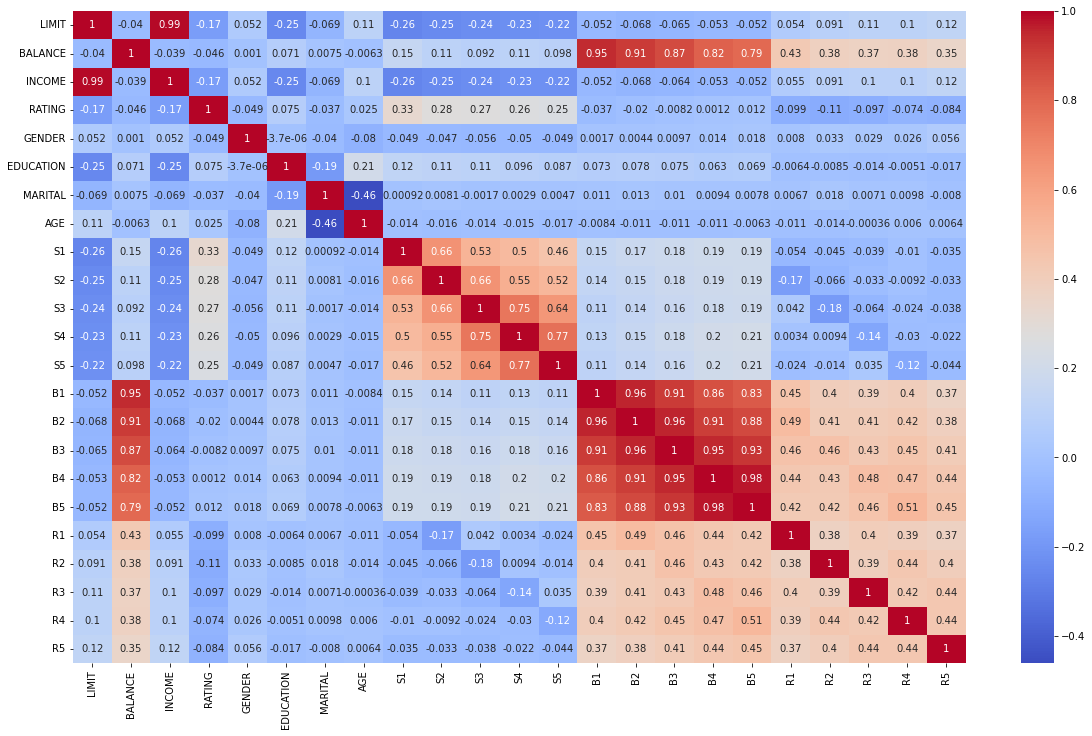

In [30]:
plt.figure(figsize = (20,12))
sns.heatmap(df_cleaned.corr(), annot = True, cmap="coolwarm")

In [31]:
#sort the high correlation values associated with 'INCOME'
cls = df_cleaned.corr()['B1'].sort_values().head(10).index
cls

Index(['LIMIT', 'INCOME', 'RATING', 'AGE', 'GENDER', 'MARITAL', 'EDUCATION',
       'S3', 'S5', 'S4'],
      dtype='object')

#### ii.
#### Alternatively, we can use PCA to break down all of the variables in the data frame into smaller components. First, we must remove the 'B1' column (target variable) from the data set. Since we have normalised our dataset, we do not need to rescale the dataset again at this stage.

In [32]:
#drop the B1 column

X = df_cleaned.drop(['B1'],axis=1)
y = df_cleaned['B1']

In [33]:
#scaler = StandardScaler()
#scaler.fit(X)
#X_std = scaler.transform(X)
X

,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,S2,...,S5,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,0.392157,0.000000,0.413204,1.0,1.0,0.333333,1.0,0.230769,0.125,0.111111,...,0.125,0.068300,0.100017,0.141155,0.169331,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.333333,0.002358,0.287092,0.0,1.0,0.666667,0.5,0.538462,0.125,0.111111,...,0.125,0.072040,0.113209,0.171122,0.181576,0.054364,0.178039,0.447544,0.186774,0.373583
6,0.039216,0.171072,0.024080,0.0,0.0,1.000000,1.0,0.589744,0.375,0.333333,...,0.125,0.254033,0.286866,0.348245,0.169331,0.000000,0.051957,0.061823,0.000000,0.000000
7,0.078431,0.246709,0.084655,0.0,1.0,0.666667,0.5,0.333333,0.125,0.111111,...,0.125,0.285526,0.220015,0.249902,0.280314,0.181818,0.086595,0.060158,0.103648,0.101215
9,0.039216,0.181074,0.018552,0.0,1.0,0.333333,1.0,0.051282,0.625,0.444444,...,0.375,0.247349,0.294836,0.347402,0.379514,0.000000,0.216488,0.000000,0.207297,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18760,0.392157,0.015118,0.436793,1.0,0.0,0.666667,0.5,0.333333,0.375,0.333333,...,0.375,0.083934,0.116058,0.158578,0.186319,0.000000,0.000000,0.000000,0.000000,0.000000
18761,0.000000,0.053226,0.000000,0.0,0.0,1.000000,0.5,0.564103,0.125,0.111111,...,0.125,0.068300,0.100017,0.141155,0.169331,0.000000,0.000000,0.000000,0.000000,0.000000
18763,0.137255,0.438758,0.150931,1.0,0.0,0.666667,1.0,0.333333,0.375,0.333333,...,0.375,0.564723,0.597403,0.716861,0.720800,0.318182,0.000000,0.728560,0.000000,0.404858
18765,0.274510,0.010177,0.256106,0.0,0.0,1.000000,1.0,0.564103,0.000,0.000000,...,0.125,0.090200,0.157629,0.177325,0.169331,0.320545,0.779183,0.013426,0.000000,0.000000


#### Then, we need to create a covariance matrix. 

In [34]:
print('NumPy covariance matrix: \n%s' %np.cov(X.T))

NumPy covariance matrix: 
[[ 4.28081371e-02 -1.73456291e-03  4.36680984e-02 -1.55195105e-02
   5.25907169e-03 -1.26836330e-02 -3.72459802e-03  5.11961282e-03
  -6.87515117e-03 -5.56811747e-03 -6.11130938e-03 -5.53114686e-03
  -5.27190793e-03 -2.84828034e-03 -2.61243096e-03 -2.12601607e-03
  -2.03558345e-03  2.09185833e-03  3.15746964e-03  3.86042067e-03
   3.76760877e-03  4.44256256e-03]
 [-1.73456291e-03  4.46355596e-02 -1.76646220e-03 -4.21508011e-03
   1.07801004e-04  3.63917350e-03  4.15449580e-04 -3.10766238e-04
   3.93072193e-03  2.50361987e-03  2.41073778e-03  2.66133094e-03
   2.37459616e-03  3.88816902e-02  3.56937724e-02  3.36579567e-02
   3.14440652e-02  1.69334614e-02  1.34758357e-02  1.38449065e-02
   1.38926911e-02  1.28156434e-02]
 [ 4.36680984e-02 -1.76646220e-03  4.51322876e-02 -1.57949533e-02
   5.34577735e-03 -1.29417566e-02 -3.82885221e-03  5.19709213e-03
  -7.00751484e-03 -5.70081489e-03 -6.26143832e-03 -5.63630456e-03
  -5.39964083e-03 -2.90789666e-03 -2.66187594e

#### Following that, we compute the Eigen Values and Eigen Vectors to understand the multidimensional vector space of the dataset.

In [35]:
#Perform eigen decomposition on covariance matrix
cov_mat = np.cov(X.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-7.17000551e-02  1.95952361e-02 -1.48742754e-01  3.87095094e-01
   4.24654922e-01  2.59598612e-02 -3.42821666e-01  9.18974680e-02
   1.37028378e-02 -2.76890967e-02  3.05416888e-03  1.04248485e-02
  -6.82261820e-03 -9.10700580e-03 -1.43080529e-02  1.98834593e-04
  -7.16941747e-01  3.56952052e-03 -5.64514500e-03  5.61556458e-03
   5.48099831e-03  3.49211094e-03]
 [-9.34226931e-02 -3.79972713e-01  6.33530936e-02 -8.50774578e-03
  -1.69590283e-02 -1.16739221e-01 -1.14677070e-01 -1.47211968e-01
   2.78409459e-01 -5.28619505e-02 -9.27630564e-03 -4.00227283e-03
   6.23782007e-02 -4.46758111e-01  5.54213800e-01  1.27203093e-01
   9.17855579e-05 -1.06294086e-02  1.00918336e-01 -7.91235048e-03
  -1.81704850e-01 -3.78769901e-01]
 [-7.32109637e-02  2.00639379e-02 -1.52086581e-01  3.97381497e-01
   4.36061154e-01  2.71604587e-02 -3.53928831e-01  9.63035020e-02
   1.54549188e-02 -3.07995801e-02  4.70192939e-03  1.05069316e-02
  -4.89211547e-03 -1.13509373e-02 -1.71393098e-02  3.14126

In [36]:
#Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
0.24342211766424754
0.22206047878255636
0.2009630103769958
0.09874554637524607
0.09369410135384364
0.0448199803135031
0.04137912882128114
0.031202646300432794
0.030911550400452473
0.022872501207965207
0.01913180038587834
0.017695044425926287
0.017011165227579998
0.010588375543564763
0.008212649883937065
0.005068232079728588
0.0002860964133241782
0.000654129653031641
0.0011300765823064165
0.002107767807359283
0.0032269485433486333
0.002885772836761028


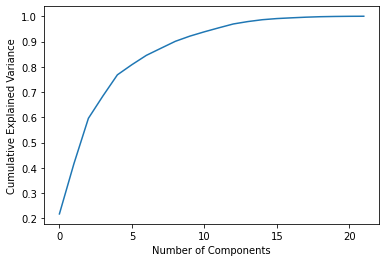

In [37]:
#scree plot to explain cumulative variance
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

#### Using the following codes, we can determine that the optimal number of PCA components is 6. This is because the sum of the variance ratios for these components can explain approximately 81.3% of the variance in the X dataset.

In [38]:
pca =PCA(n_components=6)
X_pca =pca.fit_transform(X)
print(pca.explained_variance_ratio_)

[0.21771652 0.19861069 0.17974113 0.08831793 0.08379992 0.04008695]


In [39]:
pca.explained_variance_ratio_.sum()

0.8082731361665739

#### For this process, we have reduced the dimension of the data frame that can be used for the next predictive modelling phase.

# Qn3

#### In order to perform the data visualisation process, we need to convert the categorical vairables such as 'RATING', 'GENDER', 'EDUCATION', 'MARITAL', 'AGE', 'S1', 'S2', 'S3', 'S4', & 'S5' as strings.

In [40]:
df_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12503 entries, 0 to 18768
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT      12503 non-null  int64  
 1   BALANCE    12503 non-null  float64
 2   INCOME     12503 non-null  int64  
 3   RATING     12503 non-null  int64  
 4   GENDER     12503 non-null  int64  
 5   EDUCATION  12503 non-null  float64
 6   MARITAL    12503 non-null  float64
 7   AGE        12503 non-null  int64  
 8   S1         12503 non-null  int64  
 9   S2         12503 non-null  int64  
 10  S3         12503 non-null  int64  
 11  S4         12503 non-null  int64  
 12  S5         12503 non-null  int64  
 13  B1         12503 non-null  int64  
 14  B2         12503 non-null  int64  
 15  B3         12503 non-null  int64  
 16  B4         12503 non-null  int64  
 17  B5         12503 non-null  int64  
 18  R1         12503 non-null  int64  
 19  R2         12503 non-null  int64  
 20  R3    

In [41]:
df_cleaned2[['RATING', 'GENDER', 'EDUCATION', 'MARITAL', 'S1', 'S2', 'S3', 'S4', 'S5']] = df_cleaned2[['RATING', 'GENDER', 'EDUCATION', 'MARITAL', 'S1', 'S2', 'S3', 'S4', 'S5']].astype(str)

In [42]:
df_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12503 entries, 0 to 18768
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT      12503 non-null  int64  
 1   BALANCE    12503 non-null  float64
 2   INCOME     12503 non-null  int64  
 3   RATING     12503 non-null  object 
 4   GENDER     12503 non-null  object 
 5   EDUCATION  12503 non-null  object 
 6   MARITAL    12503 non-null  object 
 7   AGE        12503 non-null  int64  
 8   S1         12503 non-null  object 
 9   S2         12503 non-null  object 
 10  S3         12503 non-null  object 
 11  S4         12503 non-null  object 
 12  S5         12503 non-null  object 
 13  B1         12503 non-null  int64  
 14  B2         12503 non-null  int64  
 15  B3         12503 non-null  int64  
 16  B4         12503 non-null  int64  
 17  B5         12503 non-null  int64  
 18  R1         12503 non-null  int64  
 19  R2         12503 non-null  int64  
 20  R3    

#### i
#### Generate a column chart displaying the GENDER distribution by EDUCATION level.

Text(0.5, 1.0, 'Distribution of Type by [Gender: 0=Female 1=Male] & [Education: 0: Others 1: Postgraduate 2: Tertiary 3: High School]')

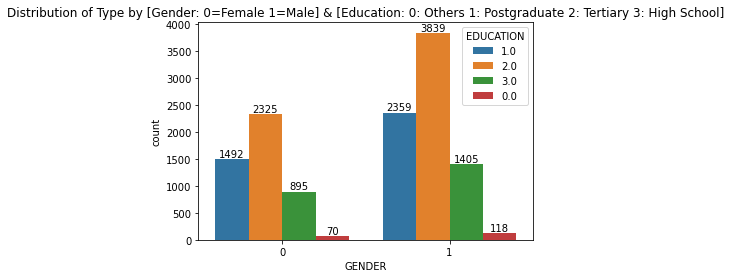

In [43]:
Gender_order = ['0','1']

ax = sns.countplot(x='GENDER',data=df_cleaned2, hue='EDUCATION', order=Gender_order)

for container in ax.containers:
    ax.bar_label(container)

p = ax

p.set_title("Distribution of Type by [Gender: 0=Female 1=Male] & [Education: 0: Others 1: Postgraduate 2: Tertiary 3: High School]")

#### ii.
#### Generate a column chart displaying the GENDER distribution by RATING level.

Text(0.5, 1.0, 'Distribution of Type by [Gender: 0=Female 1=Male] & [Rating: 0=Good 1=Bad]')

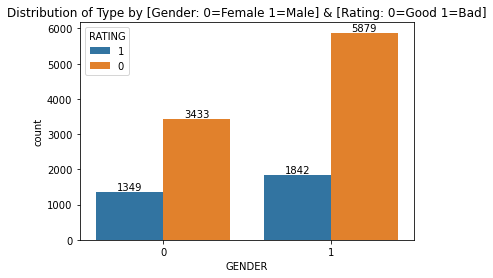

In [44]:
Gender_order = ['0','1']

ax = sns.countplot(x='GENDER',data=df_cleaned2, hue='RATING', order=Gender_order)

for container in ax.containers:
    ax.bar_label(container)

p = ax

p.set_title("Distribution of Type by [Gender: 0=Female 1=Male] & [Rating: 0=Good 1=Bad]")

#### iii.
#### Generate a column chart displaying the GENDER distribution by MARITAL status.

Text(0.5, 1.0, 'Distribution of Type by [Gender: 0=Female 1=Male] & [Marital: 0=Others-Widowed/Divorced 1=Single 2=Married] ')

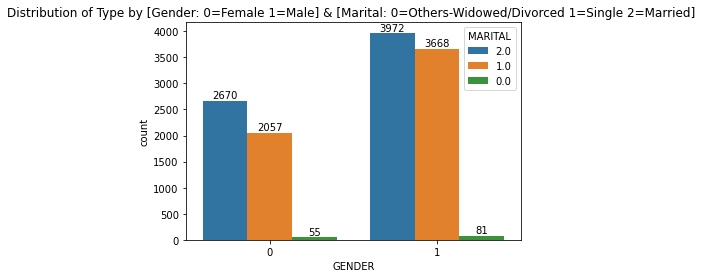

In [45]:
Gender_order = ['0','1']

ax = sns.countplot(x='GENDER',data=df_cleaned2, hue='MARITAL', order=Gender_order)

for container in ax.containers:
    ax.bar_label(container)

p = ax

p.set_title("Distribution of Type by [Gender: 0=Female 1=Male] & [Marital: 0=Others-Widowed/Divorced 1=Single 2=Married] ")

#### iv.

#### Generate a Kernel Density Estimation (KDE) plot displaying the AGE distribution by MARITAL status.

Text(0.5, 1.05, 'KDE plot depicting the age distribution by martial status: 0=Others-Widowed/Divorced 1=Single 2=Married')

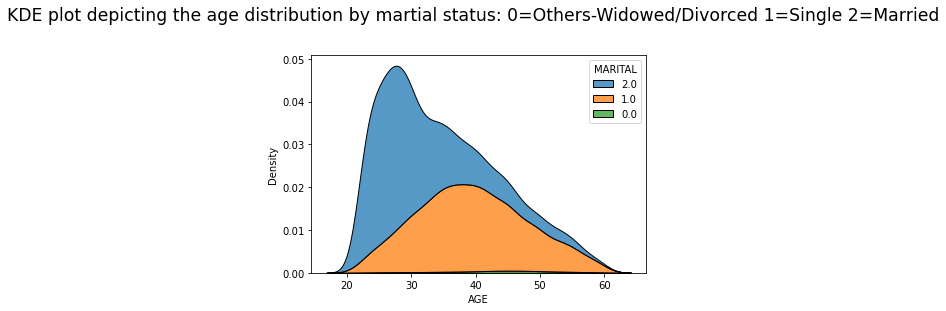

In [46]:
sns.kdeplot(data=df_cleaned2, x='AGE', hue = 'MARITAL', multiple='stack')

plt.suptitle('KDE plot depicting the age distribution by martial status: 0=Others-Widowed/Divorced 1=Single 2=Married', x=0.5, y=1.05, ha='center', fontsize='xx-large')

#### v. 
#### Generate a histogram chart displaying the INCOME distribution by GENDER.


Text(0.5, 1.05, 'Histogram for BALANCE by Gender: 0=Male 1=Female')

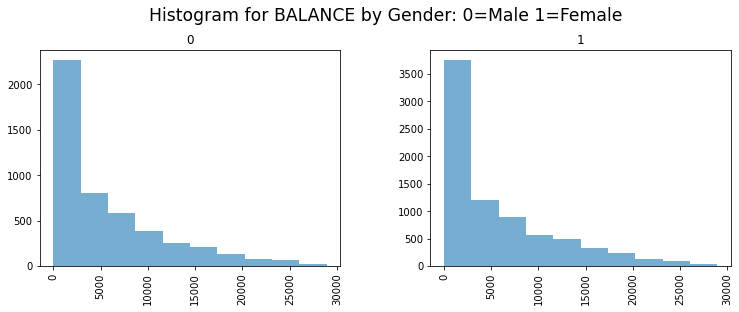

In [47]:
df_cleaned2.hist(column = 'BALANCE', by = 'GENDER', bins=10, 
                 figsize=(12,4), 
                 alpha=0.6, 
                 grid=False)

plt.suptitle('Histogram for BALANCE by Gender: 0=Male 1=Female', x=0.5, y=1.05, ha='center', fontsize='xx-large')

#### vi.
#### Generate a scatter plot displaying the INCOME and LIMIT distribution by GENDER

Text(0.5, 1.0, 'Distribution of INCOME & LIMIT by [Gender: 0=Female 1=Male]')

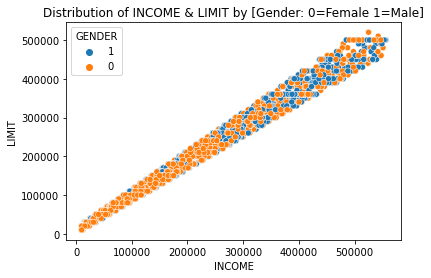

In [48]:
sns.scatterplot( x='INCOME', y='LIMIT', hue = 'GENDER',
                data = df_cleaned2);

plt.title('Distribution of INCOME & LIMIT by [Gender: 0=Female 1=Male]')

#### vii.
#### Generate a hexbin plot displaying the AGE and INCOME distribution.

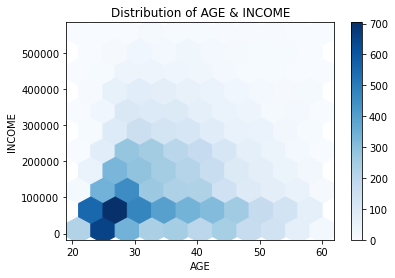

In [49]:
plt.hexbin(df_cleaned2['AGE'], df_cleaned2['INCOME'], gridsize = (10,5), cmap = plt.cm.Blues)

plt.colorbar()
plt.xlabel ('AGE')
plt.ylabel ('INCOME')
plt.title('Distribution of AGE & INCOME')
plt.show()


### Insights and Findings
#### We can see from the above charts that the male population has received more postgraduate education than the female population (refer to Figure 17). It is also worth noting that the male population frequently provides favourable ratings for the services provided by financial institutions/banks (refer Figure 18). This male population is also said to be married (refer Figure 19), and their age group belongs to the mid to late 20s (refer Figure 20), as well as having a higher savings balance in their bank account than the female population (refer to Figure 21).

#### On the contrary, we can see that the total LIMIT for the female population is higher than that of the male population, which earns 300,000 dollars per year (refer to Figure 22). And those males who earn less than 100,000 dollars per year are observed to be in their mid-twenties (refer to Figure 23).


# Qn4

#### i.
#### To do this, we need to import the following modules in to Jupyter notebook

In [50]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

#### ii.
#### To begin, we must generate an Ordinary Least Squares (OLS) Regression Results table. Check the R-squared value of the results in the table and use the p-value (0.05) to select the significant variable to be used in the Linear Regression model. In this case, we got a good R-squared value of 95% (which means that 95% of the variations of the variables in the model can be used to explain the occurrence of the target variable B1). Therefore, the variables 'BALANCE,' 'S1,' 'S2,' 'B2,' and 'R1' will be chosen.

In [51]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     B1   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 1.074e+04
Date:                Sun, 04 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:18:01   Log-Likelihood:                 21598.
No. Observations:               12503   AIC:                        -4.315e+04
Df Residuals:                   12480   BIC:                        -4.298e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0759      0.002     31.148      0.0

#### iii.
#### Using the information from the OLS regression table, we can proceed to remove the insignificant variables and create a new data frame for the independent variables (x). 

In [52]:
X_new= X.drop(['LIMIT','INCOME', 'RATING', 'GENDER', 'EDUCATION','MARITAL', 
               'AGE', 'S3', 'S4', 'S5', 'B3', 'B4', 'B5', 'R2', 'R3', 'R4', 'R5'],axis=1)
X_new

,BALANCE,S1,S2,B2,R1
0,0.000000,0.125,0.111111,0.068300,0.000000
4,0.002358,0.125,0.111111,0.072040,0.054364
6,0.171072,0.375,0.333333,0.254033,0.000000
7,0.246709,0.125,0.111111,0.285526,0.181818
9,0.181074,0.625,0.444444,0.247349,0.000000
...,...,...,...,...,...
18760,0.015118,0.375,0.333333,0.083934,0.000000
18761,0.053226,0.125,0.111111,0.068300,0.000000
18763,0.438758,0.375,0.333333,0.564723,0.318182
18765,0.010177,0.000,0.000000,0.090200,0.320545


#### iv. 
#### We can observe that the R-squared value still remains the same at 95% when the variables of 'BALANCE', 'S1', 'S2', 'B2' & 'R1' is used for the model. It can be said that for the occurence of 'B1', we need only to use the 'BALANCE', 'S1', 'S2', 'B2' & 'R1' as the independent variables.

In [53]:
X3 = sm.add_constant(X_new)
est = sm.OLS(y, X3)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     B1   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 4.713e+04
Date:                Sun, 04 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:18:01   Log-Likelihood:                 21577.
No. Observations:               12503   AIC:                        -4.314e+04
Df Residuals:                   12497   BIC:                        -4.310e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0745      0.001     90.401      0.0

# Qn5

#### Assuming that a customer from the recent month of May demostrate the following characteristics :

1.  Balance = $1000

2.  S1      = -1 (performing a prompt payment in the month of May)

3.  S2      = -1 (performing a prompt payment in the month of Apr)

4.  B2      =  $800 (amount billed in the month of Apr)

5.  R2      =  $500 (repayment paid in the month of Apr)

#### Therefore, by using the linear regression model, we can estimate that the average billable amount for this customer in the month of May (B1) is around $822.                                        

In [54]:
0.0745 + (1000*0.4041) + (-1*-0.0328) + (-1*0.0241) + (800*0.5318) + (500*-0.0143)

822.4732000000001

# Qn6

#### i.

#### In order to accomplish this, we must first install the jupyter nbextensions configurator package in the note book.

In [55]:
pip install jupyter_contrib_nbextensions

Note: you may need to restart the kernel to use updated packages.


#### ii.

#### Next, we need to type the following command into Anaconda Prompt environment.
jupyter contrib nbextension install --user

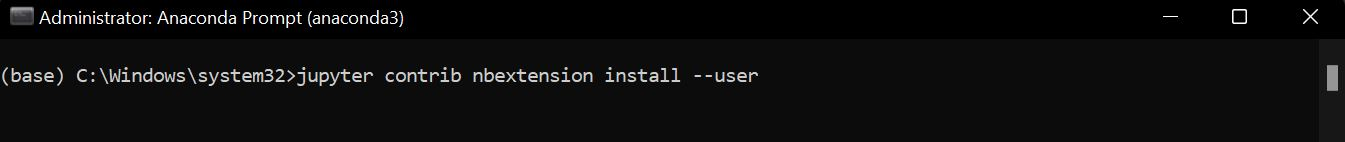

#### iii.

#### Once installed, we can search for and select the Hide input all option under the Nbextensions tab. 



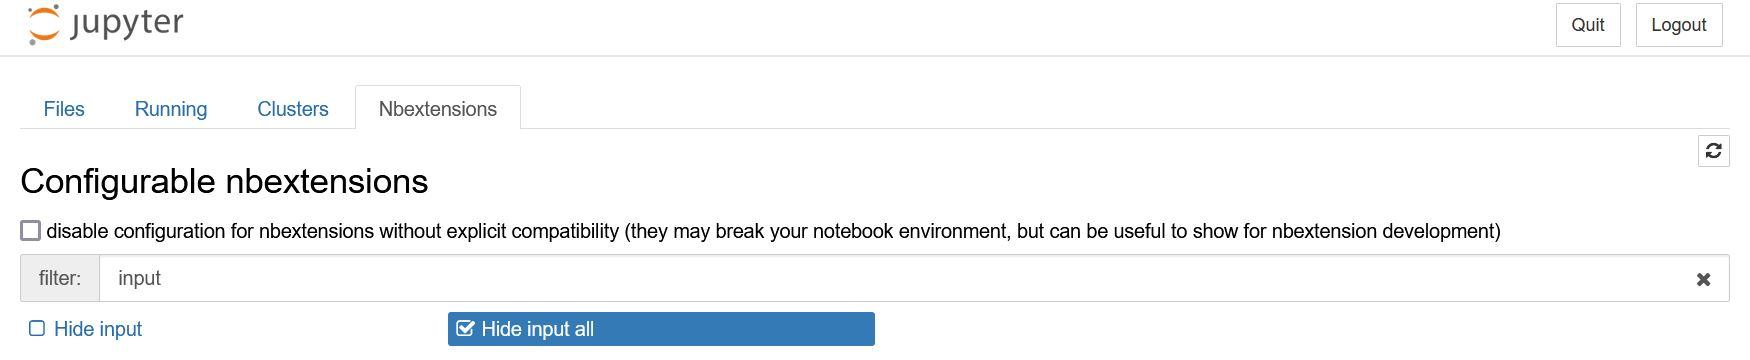



#### iv. Then we click the Hide codecell inputs button to hide all the codes in order to have a more well-documented and presented notebook. 

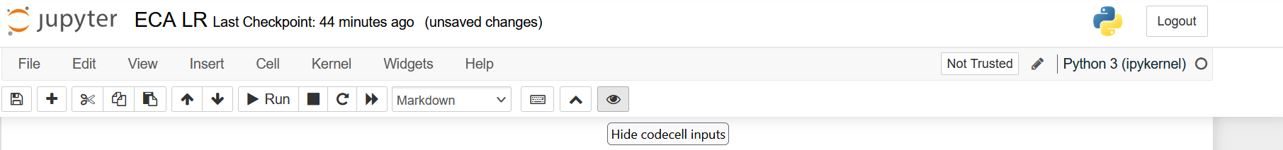